In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import operator
from matplotlib import pyplot as plt
from repositories.CorpusRepository import *
from repositories.TokenRepository import *
from repositories.EstadisticasRepository import *

path = 'corpus'
corpusRepository = CorpusRepository(path)
tokenRepository = TokenRepository()
pathVacias = None

documentos = corpusRepository.getListDocuments()
response = tokenRepository.tokenizar(documentos,pathVacias = pathVacias)


100% ▏██████████████████████████████████████████████████▕



### Gráfico de escala lineal

Antes de continuar espere completar el paso previo, usted verá una leyenda de 100% cuando finalice

(-500, 22549.75)

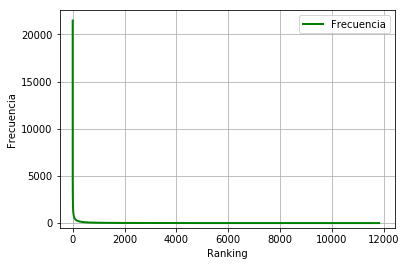

In [2]:
# Creamos una función para graficar la función logarítmica
def frecuenciasLog(ranking, frecuencias):
    x_log = np.log10(ranking)
    y_log = np.log10(frecuencias)

    recta_ajuste = np.polyfit(x_log, y_log, 1)
    r_cuadrado = pow(np.corrcoef(x_log, y_log)[0, 1], 2)

    recta_ecuacion = np.poly1d(recta_ajuste)
    recta_evaluada = recta_ecuacion(x_log)

    figura, grafico = plt.subplots()
    grafico.plot(x_log, y_log, color="b", linewidth=2, label="Frecuencia")
    grafico.plot(x_log, recta_evaluada, color="g", linewidth=2, label="Recta Ajuste")
    grafico.legend(loc="upper right")
    grafico.grid(True)
    grafico.set_xlabel("Log(Ranking)")
    grafico.set_ylabel("Log(Frecuencia)")
    grafico.set_xlim(left=0)
    grafico.set_ylim(bottom=0)
    grafico.text(0.1, 0.2, "R CUADRADO: " + str(r_cuadrado), horizontalalignment='left', verticalalignment='center')

# Creamos una función para eliminar un % de los extremos
def podar(frecuencias_absolutas, frecuencias_acumuladas, porcentaje_poda):
    frecuencia_total = sum(frecuencias_absolutas)
    
    # Lista podadas
    frecuencias_absolutas_podadas = list(frecuencias_absolutas)
    ranking_podado = range(1, len(frecuencias_absolutas_podadas) + 1)
    corte_inferior = porcentaje_poda / float(100)
    corte_superior = 1 - corte_inferior
    
    # Recorro las frecuencias_acumuladas
    for frecuencia_acumulada in frecuencias_acumuladas:
        # Saco un elemento de frecuencias_absolutas_podadas y de ranking_podado
        frecuencias_absolutas_podadas.pop(0)
        ranking_podado.pop(0)
        # Si ya se llego a eliminar lo necesario salgo
        if frecuencia_acumulada / float(frecuencia_total) >= corte_inferior:
            break
    for frecuencia_acumulada in reversed(frecuencias_acumuladas):
        frecuencias_absolutas_podadas.pop()
        ranking_podado.pop()
        if frecuencia_acumulada / float(frecuencia_total) <= corte_superior:
            break
    return (ranking_podado, frecuencias_absolutas_podadas)    

# Ordenamos los terminos por CF y los agregamos a una lista de frecuencias
lista = sorted(response['terminos'].items(), key=operator.itemgetter(1) ,reverse=True)
frecuencias = []
for termino in lista:
    frecuencias.append(termino[1]['CF'])

# Generamos el ranking que es una lista de 1 hasta la cantidad de frecuencias
ranking = xrange(1, len(frecuencias) + 1)

# Creamos el gráfico 
figura, grafico = plt.subplots()
grafico.plot(ranking, frecuencias, color="g", linewidth=2, label="Frecuencia")
grafico.legend(loc="upper right")
grafico.grid(True)
grafico.set_xlabel("Ranking")
grafico.set_ylabel("Frecuencia")
grafico.set_xlim(left=-500)
grafico.set_ylim(bottom=-500)

La gráfica concuerda con la ley del menor esfuerzo definida en la "Ley de Zipf". Para confirmar las afirmaciones se hará la gráfica en escala logarítmica

### Gráfico escala logarítmica.

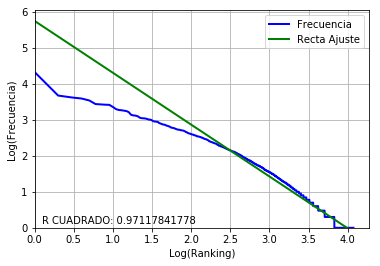

In [3]:
frecuenciasLog(ranking, frecuencias)

Junto con la gráfica logarítmica se calcula la recta de ajuste que explique la misma. Podemos ver que para valores bajos de la función log(frecuencia) es muy precisa y para valores altos tiene una gran diferencia.  
Para continuar con el estudio se van a eliminar los extremos en 5% 10% y 15% 

### Poda 5%

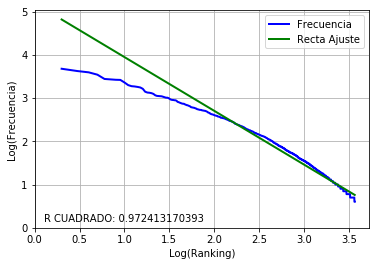

In [4]:
# Para los calculos es necesario contar con las frecuencias acumuladas
frecuencias_acumuladas = [frecuencias[0]]
for i in xrange(1, len(frecuencias)):
    frecuencias_acumuladas.append(frecuencias[i] + frecuencias_acumuladas[i-1])
    
ranking_poda, frecuencia_poda = podar(frecuencias, frecuencias_acumuladas, 5)
frecuenciasLog(ranking_poda, frecuencia_poda)

### Poda 10%

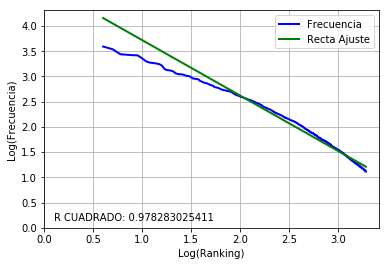

In [5]:
ranking_poda, frecuencia_poda = podar(frecuencias, frecuencias_acumuladas, 10)
frecuenciasLog(ranking_poda, frecuencia_poda)

### Poda 15%

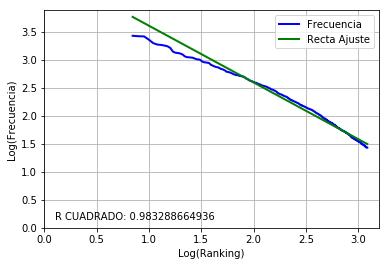

In [6]:
ranking_poda, frecuencia_poda = podar(frecuencias, frecuencias_acumuladas, 15)
frecuenciasLog(ranking_poda, frecuencia_poda)

A simple vista se observa que el mejor porcentaje de poda es 15% y que con este número se logra que la recta de ajuste tenga una coincidencia mayor con nuestra función. Para afirmar esto observamos que el R CUADRADO es de 0.983